In [2]:
import numpy as np
import pandas as pd
import pickle

In [3]:
df=pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.label.value_counts()

grapes         100
banana         100
lentil         100
mango          100
blackgram      100
mothbeans      100
maize          100
coconut        100
papaya         100
kidneybeans    100
chickpea       100
pigeonpeas     100
cotton         100
apple          100
coffee         100
pomegranate    100
watermelon     100
rice           100
mungbean       100
orange         100
jute           100
muskmelon      100
Name: label, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

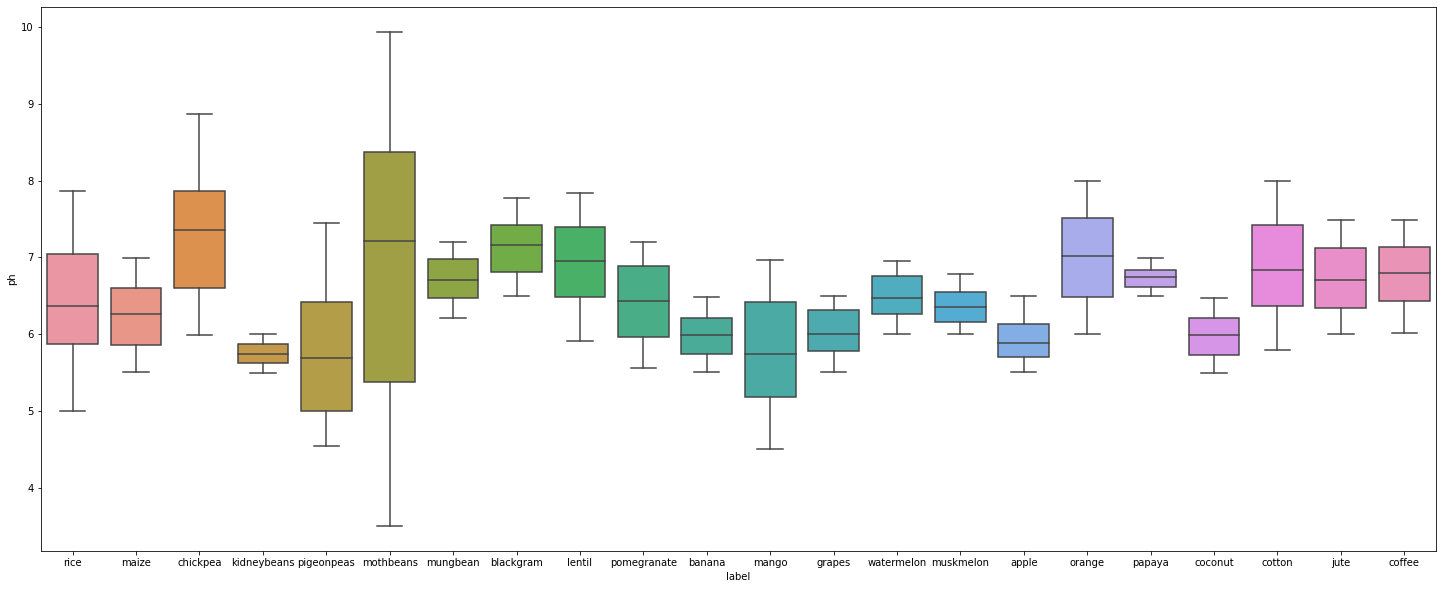

In [10]:
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(x='label',y='ph',data = df)

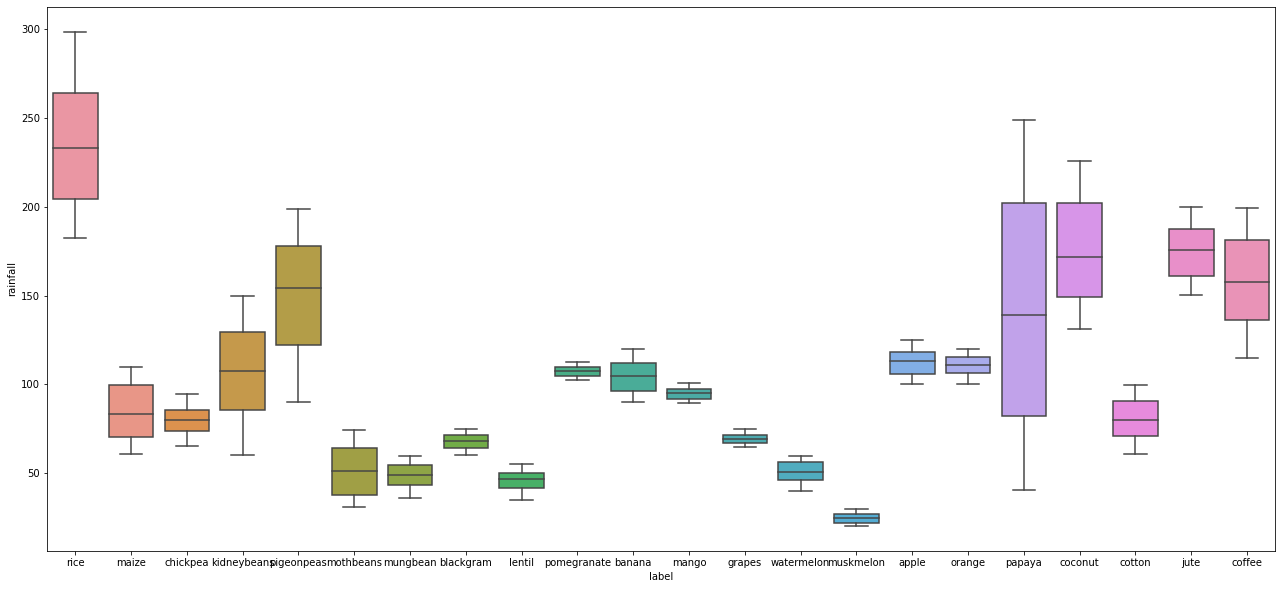

In [11]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x='label',y='rainfall',data = df)

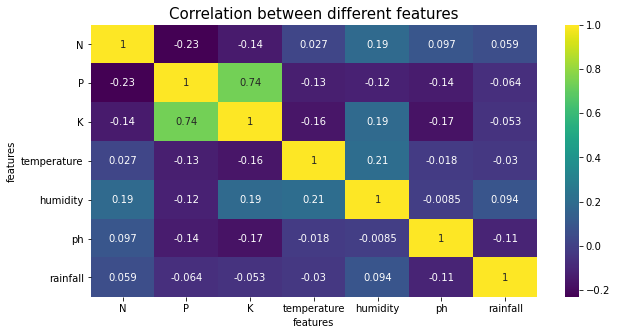

In [12]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Allocating dependent and independent variable
y = df.label
X = df.drop(columns='label')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_pred= gnb.predict(X_test)

In [17]:
accuracy_gnb = metrics.accuracy_score(y_test,gnb_pred)

In [18]:
accuracy_gnb

0.9945454545454545

In [19]:
score = cross_val_score(gnb , X , y , cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [20]:
gnb_score = gnb.score(X_test, y_test)
print("Naive Beyes model score : ",gnb_score)

Naive Beyes model score :  0.9945454545454545


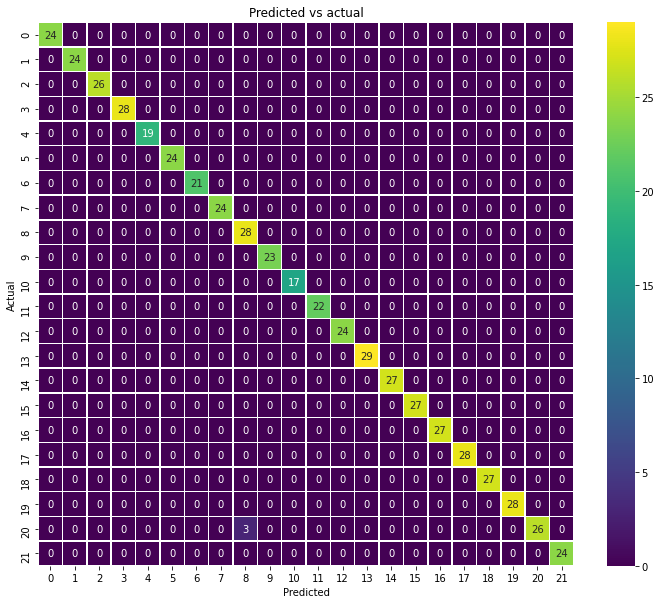

In [21]:
cm_gnb = confusion_matrix(y_test, gnb_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm_gnb, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [22]:
#SVM
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_pred = svm_model_linear.predict(X_test)

In [23]:
accuracy_svm = metrics.accuracy_score(y_test,svm_pred)

In [24]:
accuracy_svm

0.9872727272727273

In [25]:
score = svm_model_linear.score(X_test, y_test)
print("SVM model score ",score)

SVM model score  0.9872727272727273


In [26]:
score = cross_val_score(svm_model_linear , X , y , cv=5)
print('Cross validation score: ',score)


Cross validation score:  [0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]


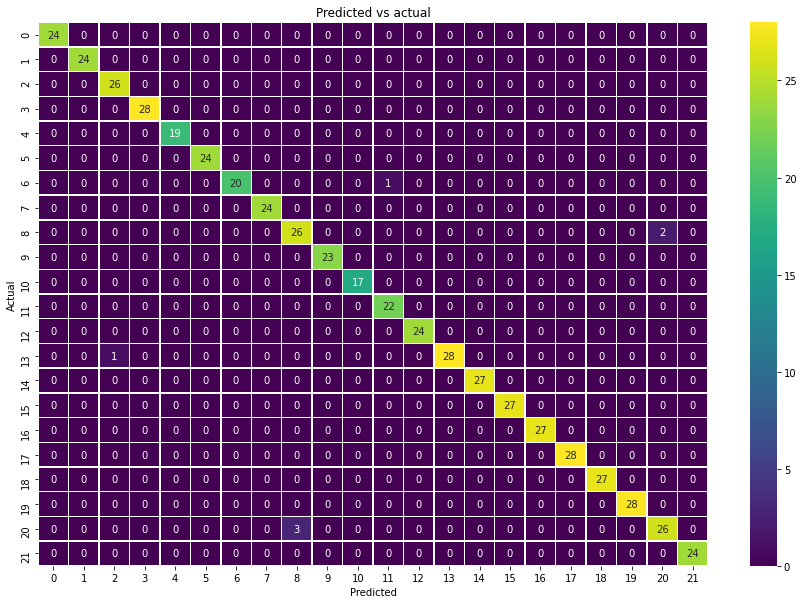

In [27]:
cm_svm = confusion_matrix(y_test, svm_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [28]:
#decision_tree
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
dtree_pred = dtree_model.predict(X_test)

In [29]:
accuracy_dtree = metrics.accuracy_score(y_test,dtree_pred)

In [30]:
accuracy_dtree

0.9509090909090909

In [31]:
score = dtree_model.score(X_test, y_test)
print("D Tree model score ",score)

D Tree model score  0.9509090909090909


In [32]:
score = cross_val_score(dtree_model , X , y , cv=5)
print('Cross validation score: ',score)


Cross validation score:  [0.91136364 0.9        0.84090909 0.75227273 0.87727273]


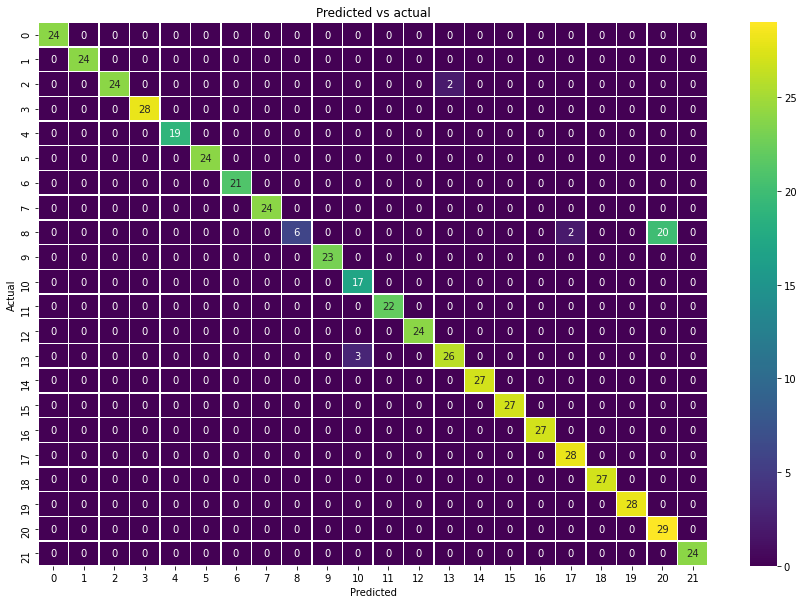

In [33]:
#con_matrix
cm_dtree = confusion_matrix(y_test, dtree_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dtree, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [34]:
#linear_reg
from sklearn.ensemble import RandomForestClassifier
RFC_clf = RandomForestClassifier().fit(X_train, y_train)
RFC_clf_pred = RFC_clf.predict(X_test)


In [35]:
accuracy_RFC = metrics.accuracy_score(y_test,RFC_clf_pred)

In [36]:
accuracy_RFC 

0.9981818181818182

In [37]:
score = RFC_clf.score(X_test, y_test)
print("Random Forest Classifier model score ",score)

Random Forest Classifier model score  0.9981818181818182


In [38]:
score = cross_val_score(RFC_clf , X , y , cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99318182 0.99545455 0.99545455 0.98863636]


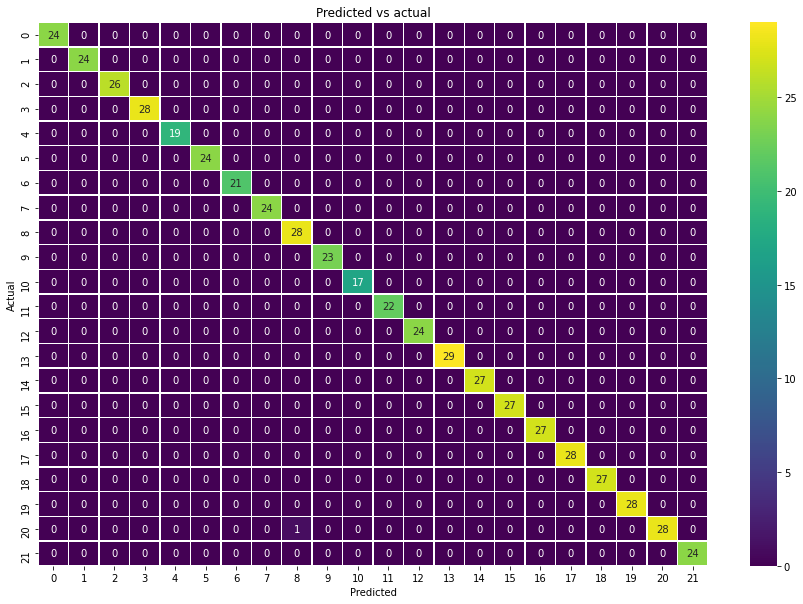

In [39]:
cm_RFC = confusion_matrix(y_test, RFC_clf_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_RFC, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

In [40]:
#performance

In [41]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [42]:
#svm
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      0.95      0.98        21
      grapes       1.00      1.00      1.00        24
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       0.96      1.00      0.98        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [43]:
#decision_tree
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      0.92      0.96        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.85      1.00      0.92        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       0.93      0.90      0.91        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       0.93    

In [44]:
# random
print(classification_report(y_test, RFC_clf_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [45]:
print(accuracy_gnb)
print(accuracy_svm)
print(accuracy_dtree)
print(accuracy_RFC)

0.9945454545454545
0.9872727272727273
0.9509090909090909
0.9981818181818182


In [46]:
#testing

In [47]:
X_test.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [48]:
user_input = [[40,30,15,39.00,75.00,7.8,40.00]]
df = pd.DataFrame(user_input, columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

RFC_clf.predict(df)

array(['mungbean'], dtype=object)

Saved All Models
